In [7]:
FILENAME = '/home/josh/scrapbox/toudai/cuwsdm_test.raw.en'
DBNAME = '/home/josh/scrapbox/toudai/cuwsdm_words.db'

In [8]:
import re
import spacy
target_word_regex = re.compile(r'<define>\s\w+\s</define>')
wordset = set()
nlp = spacy.load('en_core_web_md')

for line in open(FILENAME, 'r'):
    word = next(target_word_regex.finditer(line)).group(0)[9:-10]
    wordset.add(word)

print(f'Found {len(wordset)} words, like {list(wordset)[0:5]}')

lemmas = {
    nlp(word)[0].lemma_ for word in wordset
}

print(f'Found {len(lemmas)} lemmas, like {list(lemmas)[0:5]}')

Found 1054 words, like ['basque', 'satisfy', 'wan', 'sail', 'calibre']
Found 1008 lemmas, like ['basque', 'satisfy', 'wan', 'sail', 'calibre']


In [13]:
import sqlite3

con = sqlite3.connect(DBNAME)
cur = con.cursor()
lemma_list = list(lemmas)



sentence_count_query = f"""
select lemma, COUNT(DISTINCT sentence) from words where lemma in ({','.join('?' * len(lemma_list))})
GROUP BY lemma;
"""

word_count_query = f"""
select lemma, COUNT(*) from words where lemma in ({','.join('?' * len(lemma_list))})
GROUP BY lemma;
"""

sentence_counts = {
    lemma: count for lemma, count in cur.execute(sentence_count_query, tuple(lemmas))
}

word_counts = {
    lemma: count for lemma, count in cur.execute(word_count_query, tuple(lemmas))
}

sentence_counts, word_counts

({'abate': 136,
  'abatement': 36,
  'absence': 985,
  'absorb': 978,
  'abstain': 148,
  'accompaniment': 413,
  'ache': 126,
  'acknowledge': 995,
  'acoustic': 728,
  'actor': 803,
  'actually': 986,
  'addition': 990,
  'adopt': 981,
  'adventurer': 417,
  'advocate': 969,
  'aerosol': 116,
  'agenda': 846,
  'akan': 83,
  'alarm': 828,
  'alert': 954,
  'alien': 935,
  'aliquot': 42,
  'allow': 970,
  'almighty': 169,
  'aloe': 107,
  'along': 981,
  'amend': 923,
  'analogue': 580,
  'analyse': 542,
  'ancillary': 203,
  'animation': 822,
  'animus': 52,
  'annunciation': 212,
  'anoint': 104,
  'anthem': 914,
  'antique': 833,
  'antiviral': 82,
  'apostle': 710,
  'apply': 976,
  'apprentice': 945,
  'approach': 973,
  'arsenal': 920,
  'artificial': 925,
  'asexual': 81,
  'assimilation': 388,
  'assyrian': 374,
  'asynchronous': 169,
  'atom': 861,
  'attend': 969,
  'attention': 987,
  'attorney': 892,
  'attraction': 971,
  'attractively': 19,
  'attractiveness': 102,
  'au

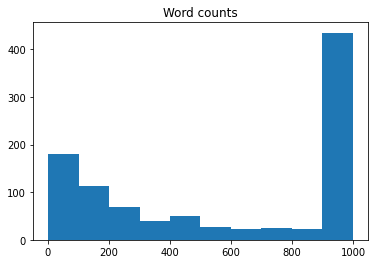

In [15]:
import matplotlib.pyplot as plt

plt.hist(list(word_counts.values()))
plt.title('Word counts')
plt.show()

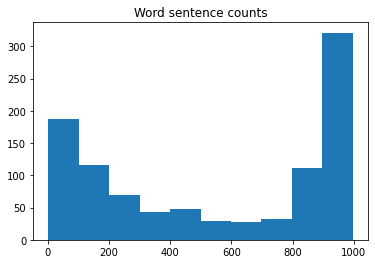

In [16]:
plt.hist(list(sentence_counts.values()))
plt.title('Word sentence counts')
plt.show()